In [191]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

## Tokenization and Stemming

In [2]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
# Select random review and business_id
m = randrange(len(data))
business_id_1 = data[m]['business_id']
business_id_1

'Nc7cqq5k0WZsVhu25QrmNQ'

In [128]:
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [129]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['the', 'gang', 'at', 'sun', 'valley', 'stereo', 'is', 'definitely', 'top', 'notch', 'ryan', 'gets', 'right', 'to', 'the', 'point', 'and', 'saw', 'what', 'i', 'was', 'interested', 'in', 'and', 'we', 'worked', 'together', 'to', 'verify', 'that', 'all', 'the', 'parts', 'were', 'in', 'to', 'upgrade', 'my', '2004', 'rx-8', 'with', 'a', 'pioneer', '4000nex', 'touchscreen', 'and', 'back-up', 'camera', 'before', 'i', 'drove', '90', 'minutes', 'for', 'the', 'work', 'when', 'i', 'first', 'left', 'there', 'was', 'some', 'adjustments', 'needed', 'they', 'took', 'me', 'back', 'in', 'without', 'hesitation', 'and', 'made', 'everything', 'right', 'the', 'installer', 'was', 'committed', 'to', 'treating', 'my', 'car', 'like', 'it', 'was', 'his', 'own', 'he', 'took', 'the', 'extra', 'steps', 'to', 'make', 'it', 'all', 'right', 'and', 'even', 'fixed', 'the', 'hatch', 'door', 'to', 'my', '12-volt', 'socket', 'now', 'that', "'s", 'going', 'the', 'extra', 'mile', '6-stars']


In [130]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['the', 'gang', 'at', 'sun', 'valley', 'stereo', 'is', 'definit', 'top', 'notch', 'ryan', 'get', 'right', 'to', 'the', 'point', 'and', 'saw', 'what', 'i', 'wa', 'interest', 'in', 'and', 'we', 'work', 'togeth', 'to', 'verifi', 'that', 'all', 'the', 'part', 'were', 'in', 'to', 'upgrad', 'my', '2004', 'rx-8', 'with', 'a', 'pioneer', '4000nex', 'touchscreen', 'and', 'back-up', 'camera', 'befor', 'i', 'drove', '90', 'minut', 'for', 'the', 'work', 'when', 'i', 'first', 'left', 'there', 'wa', 'some', 'adjust', 'need', 'they', 'took', 'me', 'back', 'in', 'without', 'hesit', 'and', 'made', 'everyth', 'right', 'the', 'instal', 'wa', 'commit', 'to', 'treat', 'my', 'car', 'like', 'it', 'wa', 'hi', 'own', 'he', 'took', 'the', 'extra', 'step', 'to', 'make', 'it', 'all', 'right', 'and', 'even', 'fix', 'the', 'hatch', 'door', 'to', 'my', '12-volt', 'socket', 'now', 'that', "'s", 'go', 'the', 'extra', 'mile', '6-star']


In [131]:
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

the        8
to         6
and        5
was        4
right      3
          ..
rx-8       1
2004       1
upgrade    1
were       1
6-stars    1
Length: 85, dtype: int64

In [132]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

the       8
to        6
and       5
wa        4
my        3
         ..
with      1
rx-8      1
2004      1
upgrad    1
6-star    1
Length: 84, dtype: int64

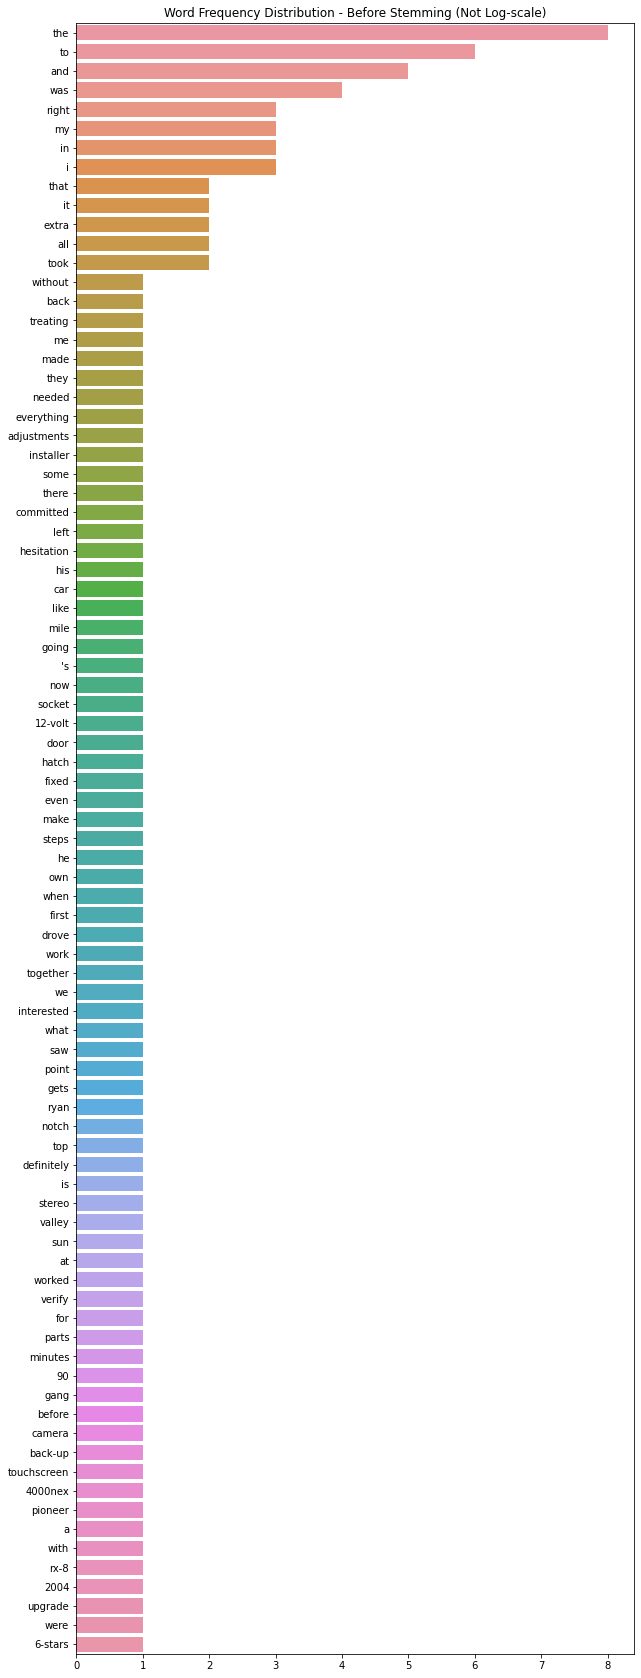

In [133]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

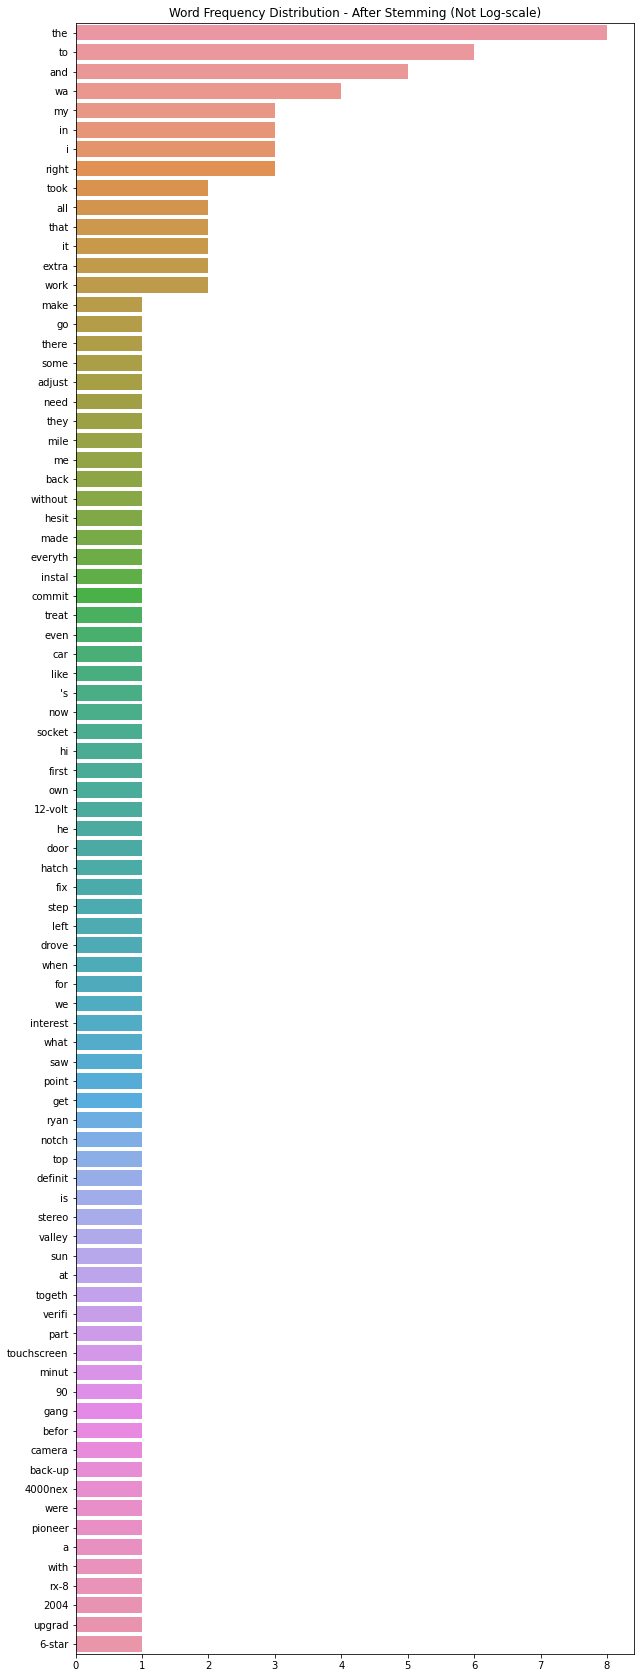

In [134]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

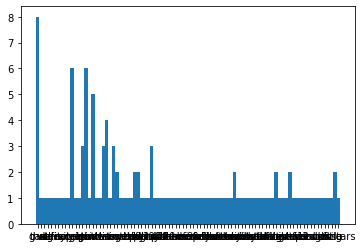

In [135]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

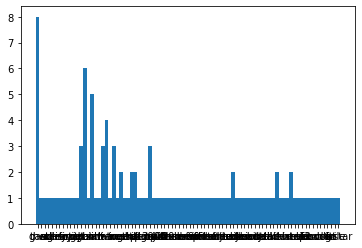

In [136]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [137]:
# Select a second random business
i = randrange(len(data))
business_id_2 = data[i]['business_id']
business_id_2

'3fw2X5bZYeW9xCz_zGhOHg'

In [165]:
preStem_2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        words = word_tokenize(text)
        preStem_2.extend(words)

In [166]:
filtered_preStem_2 = [w for w in preStem_2 if not w in string.punctuation]
# Stemming
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [167]:
freq_dist_2 = FreqDist(filtered_preStem2)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)
freq_dist_2

the          11
a            10
i            10
for           7
dessert       6
             ..
here          1
literally     1
crazy         1
's            1
finished      1
Length: 147, dtype: int64

In [168]:
stemmed_freq_dist_2 = FreqDist(stems_2)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist_2

the        11
i          10
a          10
dessert     7
for         7
           ..
make        1
liter       1
now         1
crazi       1
finish      1
Length: 144, dtype: int64

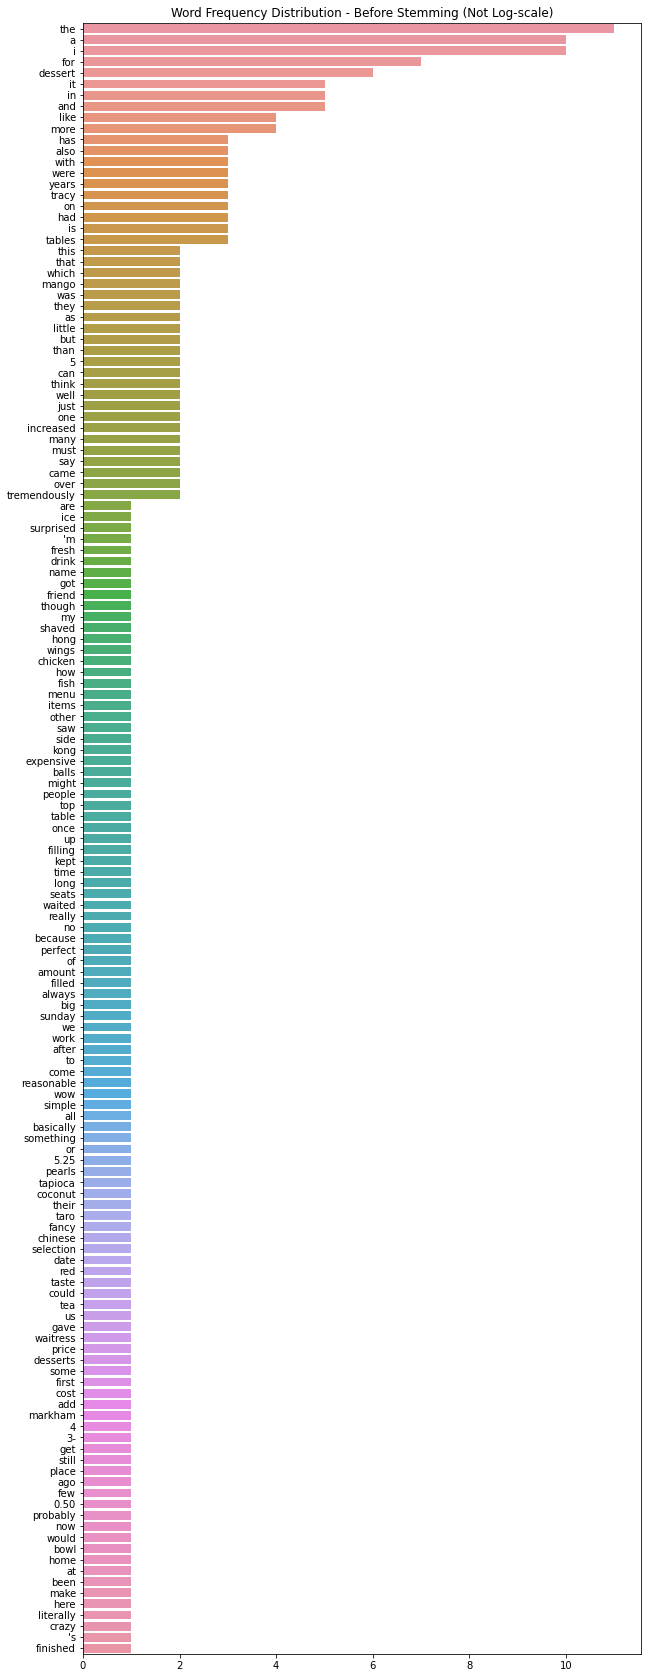

In [169]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist_2.values, y=freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

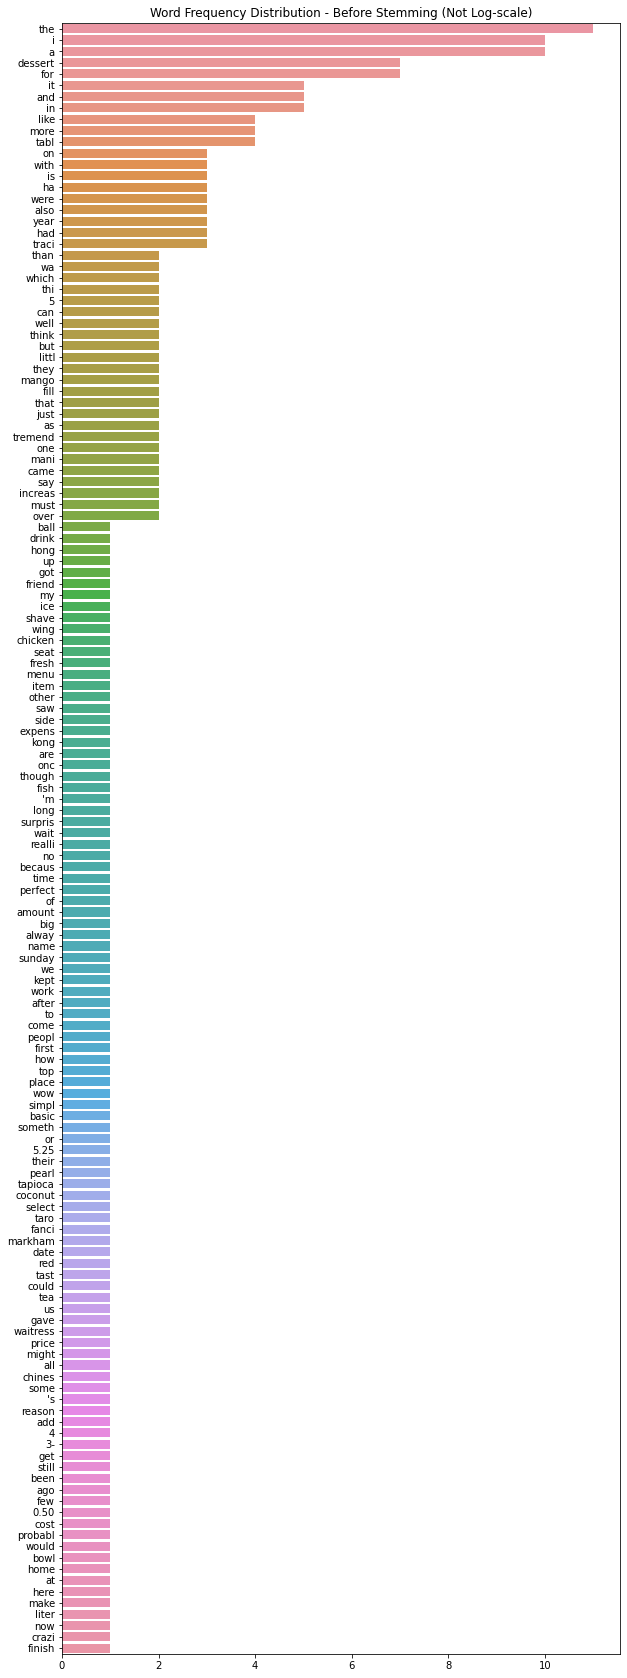

In [170]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist_2.values, y=stemmed_freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

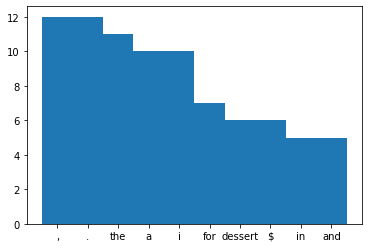

In [171]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

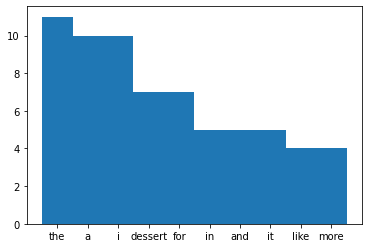

In [172]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

Remove Stopwords - Ideally we want to remove stopwords before stemming

In [149]:
sw = stopwords.words('english')

In [152]:
# Business id 1
# Remove stop words
filtered_preStem = [w for w in filtered_preStem if not w in sw]
stems = [ps.stem(w) for w in filtered_preStem]

In [158]:
freq_dist = FreqDist(filtered_preStem).most_common(10)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)

In [159]:
stemmed_freq_dist = FreqDist(stems).most_common(10)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)

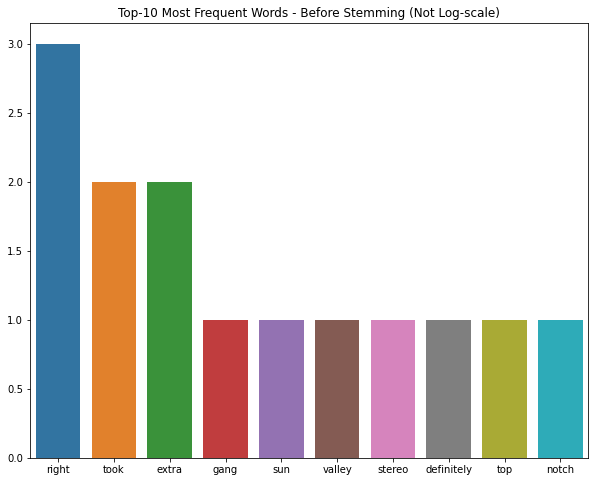

In [161]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

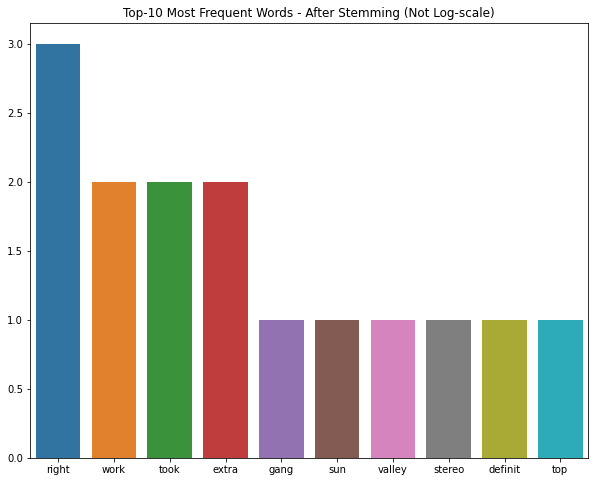

In [162]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist.index, y=stemmed_freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - After Stemming (Not Log-scale)")
plt.show()

In [173]:
# Repeat for business id 2
# Remove stop words
filtered_preStem_2 = [w for w in filtered_preStem_2 if not w in sw]
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [174]:
freq_dist_2 = FreqDist(filtered_preStem_2).most_common(10)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)

In [175]:
stemmed_freq_dist_2 = FreqDist(stems_2).most_common(10)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)

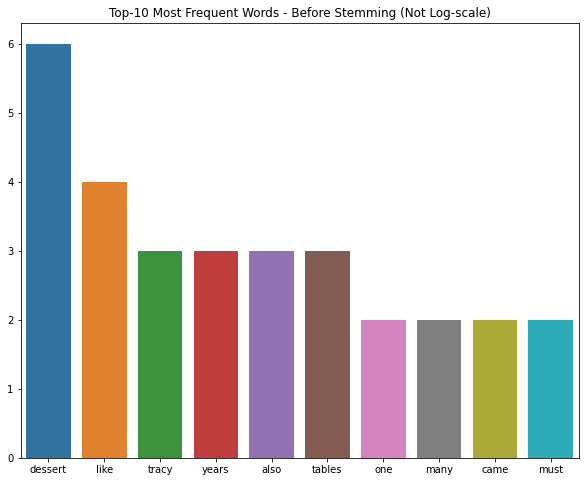

In [176]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist_2.index, y=freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

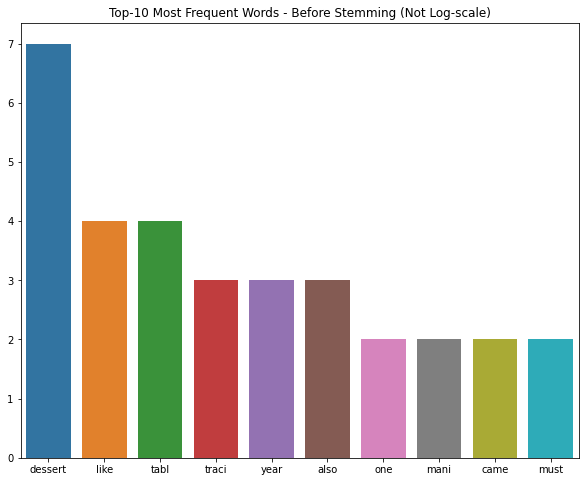

In [177]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist_2.index, y=stemmed_freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

## POS Tagging

In [178]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [187]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

["I'll be the first to admit that I was not excited about going to La Tavolta.", 'Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.', 'Im also not big on ordering pasta when I go out.', 'Alas, I was outnumbered.', 'Thank goodness!', 'I ordered the sea bass special.', 'It was to die for.', 'Cooked perfectly, seasoned perfectly, perfect portion.', 'I can not say enough good things about this dish.', 'When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?"', 'She does.', 'My hubby got the crab tortellini and also loved his.', 'I heard "mmmm this is so good" from all around the table.', 'Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant.', "Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversa

In [192]:
nlp = spacy.load("en_core_web_sm")

In [188]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [241]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

Sentence 1: 
Word            NLTK POS Tag    REGREX POS TAG  spaCy POS TAG  
We              PRP             NN              PRP            
live            VBP             NN              VB             
3               CD              CD              CD             
1/2             CD              NN              CD             
hours           NNS             NNS             NNS            
from            IN              NN              IN             
Mesa            NNP             NN              NNP            
and             CC              NN              CC             
it              PRP             NN              PRP            
's              VBZ             NN$             VBZ            
so              RB              NN              RB             
disappointing   JJ              VBG             JJ             
to              TO              NN              TO             
run             VB              NN              VB             
into            IN         

## Writing Style

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating